# Project Assignment - Crime in the U.S.

## Content
### 1. Introduction
### 2. Summary Statistics
### 3. Exploratory
### 4. Analysis


### 1. Introduction
Safety is our number one priority to us. Therefore, I would like to research the criminal case and rates in the U.S. 
The original data set contains the crime rates and totals for states across the United States for a wide range of years. The crime reports are divided into two main categories: property and violent crime. Property crime refers to burglary, larceny, and motor related crime while violent crime refers to assault, murder, rape, and robbery. The reports go from 1960 to 2019. The dataset has 2 categorical variables, 19 numeric variables, and 3115 observations.

I found the dataset from the CORGIS Data website. Here is the link to the dataset I have worked on: https://corgis-edu.github.io/corgis/csv/state_crime/ 

#### Cleaning and Changes
There were not any missing data in the dataset. 
I added the following 2 categorical variables to the original csv file.
    
	1. Region: West, Midwest, Northeast, South /Classified regions by Business Insider Website/
    
   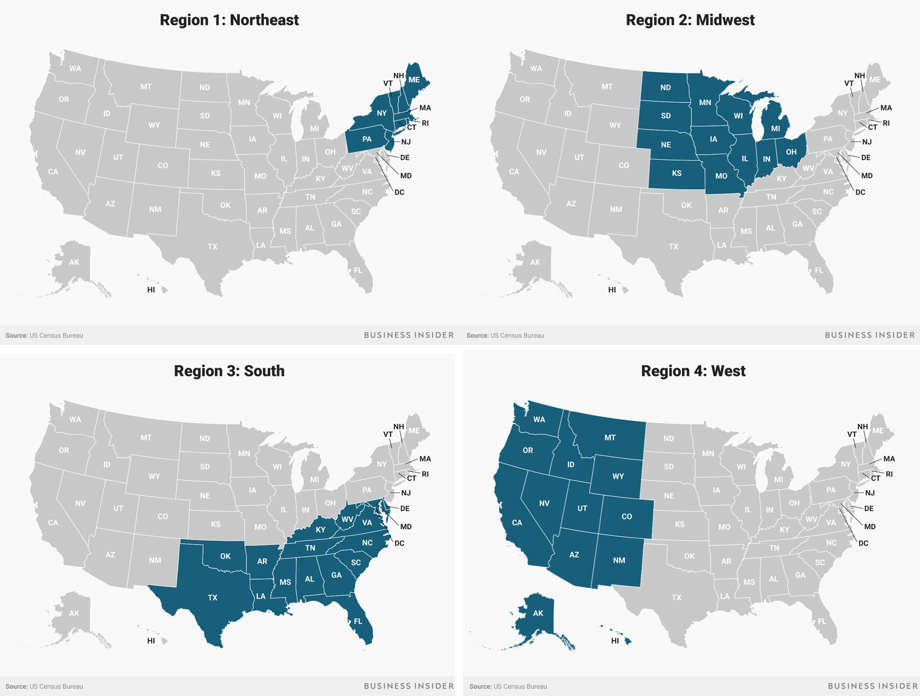
       2. Decades: 1960s, 1970s, 1980s, 1990s, 2000s, 2010s



### 2. Summary Statistics

In [1]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust

import matplotlib.pylab as plt
crimedat = pd.read_csv('C:\\Users\\Nomondari\\OneDrive\\Documents\\GitHub\\Project-Assignment\state_crimeIP.csv')

In [135]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [2]:
crimedat.describe()

,Year,Population,Rates.Property.All,Rates.Property.Burglary,Rates.Property.Larceny,Rates.Property.Motor,Rates.Violent.All,Rates.Violent.Assault,Rates.Violent.Murder,Rates.Violent.Rape,Rates.Violent.Robbery,Totals.Property.All,Totals.Property.Burglary,Totals.Property.Larceny,Totals.Property.Motor,Totals.Violent.All,Totals.Violent.Assault,Totals.Violent.Murder,Totals.Violent.Rape,Totals.Violent.Robbery
count,3115.000000,3.115000e+03,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3.115000e+03,3.115000e+03,3.115000e+03,3.115000e+03,3.115000e+03,3.115000e+03,3115.000000,3115.000000,3115.000000
mean,1989.544141,9.708502e+06,3422.746388,980.836212,2255.336950,427.062504,397.877047,230.235441,6.477207,30.179872,120.786356,3.414501e+05,1.024037e+05,2.196652e+05,4.858270e+04,4.594917e+04,2.580668e+04,663.911717,3034.240449,15175.717817
std,17.299570,3.506750e+07,1575.438156,595.277457,970.917867,412.164938,287.498896,161.647444,5.886449,16.694626,143.516777,1.299392e+06,4.219078e+05,8.294311e+05,2.339655e+05,1.759960e+05,1.013202e+05,2437.666178,11714.612850,59589.454393
min,1960.000000,2.261670e+05,66.900000,126.300000,223.700000,31.100000,9.500000,3.600000,0.200000,0.800000,1.900000,4.320000e+02,7.510000e+02,1.489000e+03,1.940000e+02,3.700000e+01,1.400000e+01,1.000000,6.000000,8.000000
25%,1975.000000,1.279156e+06,2357.650000,561.800000,1575.450000,195.450000,217.200000,112.550000,3.100000,18.500000,37.300000,3.439550e+04,1.017150e+04,2.488000e+04,3.514000e+03,3.318000e+03,1.926000e+03,48.000000,328.000000,788.000000
50%,1990.000000,3.358000e+06,3420.200000,854.300000,2251.300000,315.400000,342.200000,195.800000,5.400000,28.800000,90.400000,1.015400e+05,2.871800e+04,6.743300e+04,1.033900e+04,1.154800e+04,6.378000e+03,186.000000,931.000000,3011.000000
75%,2005.000000,6.082836e+06,4433.900000,1218.200000,2876.900000,481.800000,518.250000,315.450000,8.400000,39.800000,152.200000,2.177235e+05,5.957700e+04,1.427570e+05,2.529950e+04,2.880400e+04,1.694900e+04,464.000000,1930.000000,7840.500000
max,2019.000000,3.282395e+08,9512.100000,5182.500000,5833.800000,4082.300000,2921.800000,1557.600000,80.600000,161.600000,1635.100000,1.296112e+07,8.632512e+06,8.142228e+06,6.004453e+06,1.932274e+06,1.135607e+06,24703.000000,139815.000000,687732.000000


In [137]:
crimedat.head()

,State,Region,Year,Decade,Population,Rates.Property.All,Rates.Property.Burglary,Rates.Property.Larceny,Rates.Property.Motor,Rates.Violent.All,...,Rates.Violent.Robbery,Totals.Property.All,Totals.Property.Burglary,Totals.Property.Larceny,Totals.Property.Motor,Totals.Violent.All,Totals.Violent.Assault,Totals.Violent.Murder,Totals.Violent.Rape,Totals.Violent.Robbery
0,Alabama,South,1960,1960`s,3266740,1035.4,355.9,592.1,87.3,186.6,...,27.5,33823,11626,19344,2853,6097,4512,406,281,898
1,Alabama,South,1961,1960`s,3302000,985.5,339.3,569.4,76.8,168.5,...,19.1,32541,11205,18801,2535,5564,4255,427,252,630
2,Alabama,South,1962,1960`s,3358000,1067.0,349.1,634.5,83.4,157.3,...,22.5,35829,11722,21306,2801,5283,3995,316,218,754
3,Alabama,South,1963,1960`s,3347000,1150.9,376.9,683.4,90.6,182.7,...,24.7,38521,12614,22874,3033,6115,4755,340,192,828
4,Alabama,South,1964,1960`s,3407000,1358.7,466.6,784.1,108.0,213.1,...,29.1,46290,15898,26713,3679,7260,5555,316,397,992


In [6]:
crimedat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3115 entries, 0 to 3114
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   State                     3115 non-null   object 
 1   Region                    3115 non-null   object 
 2   Year                      3115 non-null   int64  
 3   Decade                    3115 non-null   object 
 4   Population                3115 non-null   int64  
 5   Rates.Property.All        3115 non-null   float64
 6   Rates.Property.Burglary   3115 non-null   float64
 7   Rates.Property.Larceny    3115 non-null   float64
 8   Rates.Property.Motor      3115 non-null   float64
 9   Rates.Violent.All         3115 non-null   float64
 10  Rates.Violent.Assault     3115 non-null   float64
 11  Rates.Violent.Murder      3115 non-null   float64
 12  Rates.Violent.Rape        3115 non-null   float64
 13  Rates.Violent.Robbery     3115 non-null   float64
 14  Totals.P

In [7]:
crimedat.shape

(3115, 23)

In [8]:
crimedat.sample(10)

,State,Region,Year,Decade,Population,Rates.Property.All,Rates.Property.Burglary,Rates.Property.Larceny,Rates.Property.Motor,Rates.Violent.All,...,Rates.Violent.Robbery,Totals.Property.All,Totals.Property.Burglary,Totals.Property.Larceny,Totals.Property.Motor,Totals.Violent.All,Totals.Violent.Assault,Totals.Violent.Murder,Totals.Violent.Rape,Totals.Violent.Robbery
453,Delaware,South,1993,1990`s,700000,4186.3,892.0,2979.0,315.3,685.9,...,186.7,29304,6244,20853,2207,4801,2920,35,539,1307
86,Alaska,West,1986,1980`s,534000,5675.5,1161.8,3909.9,603.7,570.4,...,88.0,30307,6204,20879,3224,3046,2142,46,388,470
1046,Kentucky,South,1986,1980`s,3728000,2757.8,824.2,1740.4,193.2,334.4,...,82.5,102810,30725,64882,7203,12467,8283,248,860,3076
1861,New Mexico,West,1961,1960`s,983000,2062.4,443.2,1398.2,221.0,130.0,...,38.8,20273,4357,13744,2172,1278,703,67,127,381
1156,Maine,NorthEast,1976,1970`s,1070000,3864.4,1313.2,2337.5,213.7,220.0,...,37.9,41349,14051,25011,2287,2354,1813,29,106,406
2435,South Carolina,South,2000,2000`s,4012012,4518.7,969.3,3125.2,388.5,828.1,...,155.0,181290,40319,125385,15586,33225,25054,291,1660,6220
1530,Missouri,MidWest,1990,1990`s,5117073,4405.3,1065.8,2800.2,539.4,715.3,...,216.4,225422,54536,143287,27599,36602,23417,449,1663,11073
835,Illinois,MidWest,2015,2010`s,12859995,224.6,1988.6,361.1,1490.2,383.8,...,27.6,28879,255729,46443,191634,49354,14910,744,4821,3549
3012,Wisconsin,MidWest,1977,1970`s,4651000,3681.9,846.9,2614.2,220.7,131.5,...,52.2,171245,39390,121588,10267,6117,2961,130,600,2426
2359,Rhode Island,NorthEast,1984,1980`s,962000,4439.3,1184.6,2562.8,691.9,334.7,...,113.4,42706,11396,24654,6656,3220,1891,33,205,1091


In [9]:
crimedat.isna()

,State,Region,Year,Decade,Population,Rates.Property.All,Rates.Property.Burglary,Rates.Property.Larceny,Rates.Property.Motor,Rates.Violent.All,...,Rates.Violent.Robbery,Totals.Property.All,Totals.Property.Burglary,Totals.Property.Larceny,Totals.Property.Motor,Totals.Violent.All,Totals.Violent.Assault,Totals.Violent.Murder,Totals.Violent.Rape,Totals.Violent.Robbery
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3110,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3111,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3112,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3113,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
crimedat.isna().sum()

State                       0
Region                      0
Year                        0
Decade                      0
Population                  0
Rates.Property.All          0
Rates.Property.Burglary     0
Rates.Property.Larceny      0
Rates.Property.Motor        0
Rates.Violent.All           0
Rates.Violent.Assault       0
Rates.Violent.Murder        0
Rates.Violent.Rape          0
Rates.Violent.Robbery       0
Totals.Property.All         0
Totals.Property.Burglary    0
Totals.Property.Larceny     0
Totals.Property.Motor       0
Totals.Violent.All          0
Totals.Violent.Assault      0
Totals.Violent.Murder       0
Totals.Violent.Rape         0
Totals.Violent.Robbery      0
dtype: int64

In [11]:
# Calculate mean of variables
crimedat.mean()

C:\Users\NOMOND~1\AppData\Local\Temp/ipykernel_8744/3244738684.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crimedat.mean()


Year                          1989.5
Population                 9708501.7
Rates.Property.All            3422.7
Rates.Property.Burglary        980.8
Rates.Property.Larceny        2255.3
Rates.Property.Motor           427.1
Rates.Violent.All              397.9
Rates.Violent.Assault          230.2
Rates.Violent.Murder             6.5
Rates.Violent.Rape              30.2
Rates.Violent.Robbery          120.8
Totals.Property.All         341450.1
Totals.Property.Burglary    102403.7
Totals.Property.Larceny     219665.2
Totals.Property.Motor        48582.7
Totals.Violent.All           45949.2
Totals.Violent.Assault       25806.7
Totals.Violent.Murder          663.9
Totals.Violent.Rape           3034.2
Totals.Violent.Robbery       15175.7
dtype: float64

In [12]:
# Calculate the median
crimedat.median()

C:\Users\NOMOND~1\AppData\Local\Temp/ipykernel_8744/2243911088.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crimedat.median()


Year                          1990.0
Population                 3358000.0
Rates.Property.All            3420.2
Rates.Property.Burglary        854.3
Rates.Property.Larceny        2251.3
Rates.Property.Motor           315.4
Rates.Violent.All              342.2
Rates.Violent.Assault          195.8
Rates.Violent.Murder             5.4
Rates.Violent.Rape              28.8
Rates.Violent.Robbery           90.4
Totals.Property.All         101540.0
Totals.Property.Burglary     28718.0
Totals.Property.Larceny      67433.0
Totals.Property.Motor        10339.0
Totals.Violent.All           11548.0
Totals.Violent.Assault        6378.0
Totals.Violent.Murder          186.0
Totals.Violent.Rape            931.0
Totals.Violent.Robbery        3011.0
dtype: float64

In [13]:
# Find the maximum amount
crimedat.max()

State                         Wyoming
Region                           West
Year                             2019
Decade                         2010`s
Population                  328239523
Rates.Property.All             9512.1
Rates.Property.Burglary        5182.5
Rates.Property.Larceny         5833.8
Rates.Property.Motor           4082.3
Rates.Violent.All              2921.8
Rates.Violent.Assault          1557.6
Rates.Violent.Murder             80.6
Rates.Violent.Rape              161.6
Rates.Violent.Robbery          1635.1
Totals.Property.All          12961116
Totals.Property.Burglary      8632512
Totals.Property.Larceny       8142228
Totals.Property.Motor         6004453
Totals.Violent.All            1932274
Totals.Violent.Assault        1135607
Totals.Violent.Murder           24703
Totals.Violent.Rape            139815
Totals.Violent.Robbery         687732
dtype: object

In [14]:
# Find the minimum amount
crimedat.min()

State                       Alabama
Region                      MidWest
Year                           1960
Decade                       1960`s
Population                   226167
Rates.Property.All             66.9
Rates.Property.Burglary       126.3
Rates.Property.Larceny        223.7
Rates.Property.Motor           31.1
Rates.Violent.All               9.5
Rates.Violent.Assault           3.6
Rates.Violent.Murder            0.2
Rates.Violent.Rape              0.8
Rates.Violent.Robbery           1.9
Totals.Property.All             432
Totals.Property.Burglary        751
Totals.Property.Larceny        1489
Totals.Property.Motor           194
Totals.Violent.All               37
Totals.Violent.Assault           14
Totals.Violent.Murder             1
Totals.Violent.Rape               6
Totals.Violent.Robbery            8
dtype: object

In [15]:
# Calculate the variance
crimedat.var()

C:\Users\NOMOND~1\AppData\Local\Temp/ipykernel_8744/66438780.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crimedat.var()


Year                                    299.3
Population                 1229729639611993.2
Rates.Property.All                  2482005.4
Rates.Property.Burglary              354355.3
Rates.Property.Larceny               942681.5
Rates.Property.Motor                 169879.9
Rates.Violent.All                     82655.6
Rates.Violent.Assault                 26129.9
Rates.Violent.Murder                     34.7
Rates.Violent.Rape                      278.7
Rates.Violent.Robbery                 20597.1
Totals.Property.All           1688418802556.6
Totals.Property.Burglary       178006215049.5
Totals.Property.Larceny        687955961242.4
Totals.Property.Motor           54739877807.1
Totals.Violent.All              30974581350.5
Totals.Violent.Assault          10265789401.3
Totals.Violent.Murder               5942216.4
Totals.Violent.Rape               137232154.2
Totals.Violent.Robbery           3550903074.9
dtype: float64

In [16]:
# Calculate the standard deviation
crimedat.std()

C:\Users\NOMOND~1\AppData\Local\Temp/ipykernel_8744/413282024.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crimedat.std()


Year                             17.3
Population                 35067501.2
Rates.Property.All             1575.4
Rates.Property.Burglary         595.3
Rates.Property.Larceny          970.9
Rates.Property.Motor            412.2
Rates.Violent.All               287.5
Rates.Violent.Assault           161.6
Rates.Violent.Murder              5.9
Rates.Violent.Rape               16.7
Rates.Violent.Robbery           143.5
Totals.Property.All         1299391.7
Totals.Property.Burglary     421907.8
Totals.Property.Larceny      829431.1
Totals.Property.Motor        233965.5
Totals.Violent.All           175996.0
Totals.Violent.Assault       101320.2
Totals.Violent.Murder          2437.7
Totals.Violent.Rape           11714.6
Totals.Violent.Robbery        59589.5
dtype: float64

In [17]:
crimedat.describe()

,Year,Population,Rates.Property.All,Rates.Property.Burglary,Rates.Property.Larceny,Rates.Property.Motor,Rates.Violent.All,Rates.Violent.Assault,Rates.Violent.Murder,Rates.Violent.Rape,Rates.Violent.Robbery,Totals.Property.All,Totals.Property.Burglary,Totals.Property.Larceny,Totals.Property.Motor,Totals.Violent.All,Totals.Violent.Assault,Totals.Violent.Murder,Totals.Violent.Rape,Totals.Violent.Robbery
count,3115.0,3115.0,3115.0,3115.0,3115.0,3115.0,3115.0,3115.0,3115.0,3115.0,3115.0,3115.0,3115.0,3115.0,3115.0,3115.0,3115.0,3115.0,3115.0,3115.0
mean,1989.5,9708501.7,3422.7,980.8,2255.3,427.1,397.9,230.2,6.5,30.2,120.8,341450.1,102403.7,219665.2,48582.7,45949.2,25806.7,663.9,3034.2,15175.7
std,17.3,35067501.2,1575.4,595.3,970.9,412.2,287.5,161.6,5.9,16.7,143.5,1299391.7,421907.8,829431.1,233965.5,175996.0,101320.2,2437.7,11714.6,59589.5
min,1960.0,226167.0,66.9,126.3,223.7,31.1,9.5,3.6,0.2,0.8,1.9,432.0,751.0,1489.0,194.0,37.0,14.0,1.0,6.0,8.0
25%,1975.0,1279155.5,2357.7,561.8,1575.4,195.4,217.2,112.5,3.1,18.5,37.3,34395.5,10171.5,24880.0,3514.0,3318.0,1926.0,48.0,328.0,788.0
50%,1990.0,3358000.0,3420.2,854.3,2251.3,315.4,342.2,195.8,5.4,28.8,90.4,101540.0,28718.0,67433.0,10339.0,11548.0,6378.0,186.0,931.0,3011.0
75%,2005.0,6082836.0,4433.9,1218.2,2876.9,481.8,518.2,315.4,8.4,39.8,152.2,217723.5,59577.0,142757.0,25299.5,28804.0,16949.0,464.0,1930.0,7840.5
max,2019.0,328239523.0,9512.1,5182.5,5833.8,4082.3,2921.8,1557.6,80.6,161.6,1635.1,12961116.0,8632512.0,8142228.0,6004453.0,1932274.0,1135607.0,24703.0,139815.0,687732.0


In [18]:
crimedat.groupby('Region')['Rates.Property.All'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
MidWest,720.0,3053.2,1239.4,123.2,2196.2,3116.4,3981.4,6212.2
NorthEast,535.0,2868.3,1345.9,66.9,1976.3,2728.0,3870.5,5882.0
South,960.0,3335.0,1516.4,95.5,2283.8,3476.2,4307.6,7819.9
West,900.0,4141.6,1738.4,119.4,2940.8,4079.1,5456.8,9512.1


In [19]:
crimedat.groupby('Region')['Rates.Violent.All'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
MidWest,720.0,316.1,192.6,14.2,182.5,289.9,421.0,1039.2
NorthEast,535.0,301.6,222.1,9.5,127.9,261.2,409.1,1180.9
South,960.0,446.9,224.2,63.1,279.4,425.4,590.1,1244.3
West,900.0,468.2,394.1,21.8,237.4,367.8,587.9,2921.8


In [20]:
crimedat.groupby('Decade')['Rates.Property.All'].describe()

,count,mean,std,min,25%,50%,75%,max
Decade,,,,,,,,
1960`s,515.0,2140.3,981.3,573.1,1427.3,1958.2,2612.1,8270.9
1970`s,520.0,4070.7,1365.1,1123.1,3078.2,3951.8,4953.8,8656.6
1980`s,520.0,4640.9,1231.4,2053.4,3818.6,4513.5,5519.4,8402.8
1990`s,520.0,4416.7,1178.2,2185.2,3687.5,4299.9,5082.6,9512.1
2000`s,520.0,3391.3,847.4,1724.3,2665.6,3382.6,4021.5,6409.0
2010`s,520.0,1864.3,1220.2,66.9,329.9,2146.6,2769.4,4860.8


In [21]:
crimedat.groupby('Decade')['Rates.Violent.All'].describe()

,count,mean,std,min,25%,50%,75%,max
Decade,,,,,,,,
1960`s,515.0,166.2,164.8,9.5,73.7,137.1,213.1,2135.1
1970`s,520.0,373.4,260.1,34.2,214.6,330.9,456.2,2226.8
1980`s,520.0,475.4,303.3,47.0,266.7,432.2,612.9,2274.8
1990`s,520.0,560.6,370.9,65.4,316.3,511.7,725.2,2921.8
2000`s,520.0,431.3,228.5,78.2,277.6,384.1,534.6,1637.9
2010`s,520.0,378.2,178.1,99.3,255.6,354.0,449.9,1326.8


### 3. Exploratory

In [8]:
crimedat['high property rates'] = crimedat['Rates.Property.All'] > crimedat['Rates.Property.All'].mean()

In [9]:
crimedat.groupby('high property rates')['Rates.Property.All'].describe()

,count,mean,std,min,25%,50%,75%,max
high property rates,,,,,,,,
False,1559.0,2168.2,902.4,66.9,1669.8,2358.0,2859.1,3420.3
True,1556.0,4679.7,997.9,3423.9,3937.0,4436.2,5205.0,9512.1


<AxesSubplot:title={'center':'Rates.Property.All'}, xlabel='high property rates'>

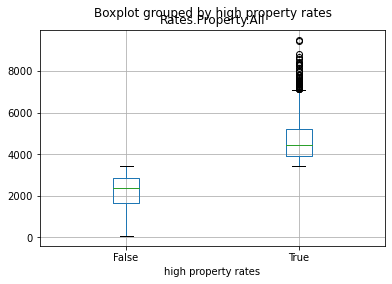

In [10]:
crimedat.boxplot(column=['Rates.Property.All'], by='high property rates')
# We can see that property rates which is higher than average has many outliers between 7,000 and 10,000.

In [11]:
# Remove outliers by using IQR technique
def outliers(crimedat, feature):
    Q1= crimedat[feature].quantile(0.25)
    Q3 = crimedat[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(crimedat, "Rates.Property.All")

print("Upper: ", upper)
print("Lower: ", lower)

Upper:  7548.274999999999
Lower:  -756.724999999999


In [12]:
# Look on outliers:
crimedat[(crimedat['Rates.Property.All'] < lower) | (crimedat['Rates.Property.All'] > upper)]

,State,Region,Year,Decade,Population,Rates.Property.All,Rates.Property.Burglary,Rates.Property.Larceny,Rates.Property.Motor,Rates.Violent.All,...,Totals.Property.All,Totals.Property.Burglary,Totals.Property.Larceny,Totals.Property.Motor,Totals.Violent.All,Totals.Violent.Assault,Totals.Violent.Murder,Totals.Violent.Rape,Totals.Violent.Robbery,high property rates
134,Arizona,West,1974,1970`s,2153000,7654.9,2534.0,4518.6,602.3,566.7,...,164811,54557,97286,12968,12202,6793,206,807,4396,True
135,Arizona,West,1975,1970`s,2224000,7793.7,2529.9,4747.7,516.1,547.8,...,173331,56265,105588,11478,12184,7424,191,789,3780,True
489,District of Columbia,West,1969,1960`s,798000,8270.9,2869.9,3998.7,1402.3,2135.1,...,66002,22902,31910,11190,17038,3609,287,776,12366,True
490,District of Columbia,West,1970,1970`s,756510,8656.6,2873.7,4314.3,1468.6,2226.8,...,65488,21740,32638,11110,16846,4089,221,720,11816,True
500,District of Columbia,West,1980,1980`s,635233,8012.2,2559.7,4890.8,561.7,2010.6,...,50896,16260,31068,3568,12772,3236,200,439,8897,True
501,District of Columbia,West,1981,1980`s,636000,8402.8,2646.5,5164.3,592.0,2274.8,...,53442,16832,32845,3765,14468,3432,223,414,10399,True
502,District of Columbia,West,1982,1980`s,631000,8287.6,2341.4,5298.7,647.5,2123.1,...,52295,14774,33435,4086,13397,3645,194,421,9137,True
508,District of Columbia,West,1988,1980`s,620000,7993.1,1983.9,4616.8,1392.4,1921.6,...,49557,12300,28624,8633,11914,5690,369,165,5690,True
509,District of Columbia,West,1989,1980`s,604000,8151.5,1950.3,4828.5,1372.7,2141.9,...,49235,11780,29164,8291,12937,5775,434,186,6542,True
510,District of Columbia,West,1990,1990`s,606900,8316.0,1983.0,4996.9,1336.1,2458.2,...,50470,12035,30326,8109,14919,6779,472,303,7365,True


In [26]:
crimedat.groupby('Region')['Rates.Property.All'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
MidWest,720.0,3053.2,1239.4,123.2,2196.2,3116.4,3981.4,6212.2
NorthEast,535.0,2868.3,1345.9,66.9,1976.3,2728.0,3870.5,5882.0
South,960.0,3335.0,1516.4,95.5,2283.8,3476.2,4307.6,7819.9
West,900.0,4141.6,1738.4,119.4,2940.8,4079.1,5456.8,9512.1


<AxesSubplot:title={'center':'Rates.Property.All'}, xlabel='Region'>

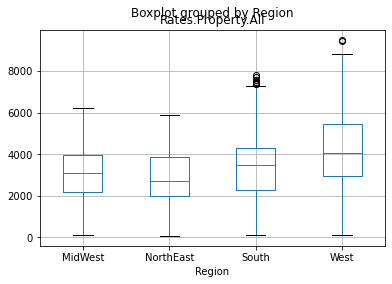

In [25]:
crimedat.boxplot(column=['Rates.Property.All'], by='Region')
# Northeast has the lowest quartiles and the median is 2,728. In contrast, west region has the highest quartiles 
# and the median is 4,079.1. Also, midwest and south have not any outliers compared with the other two regions.

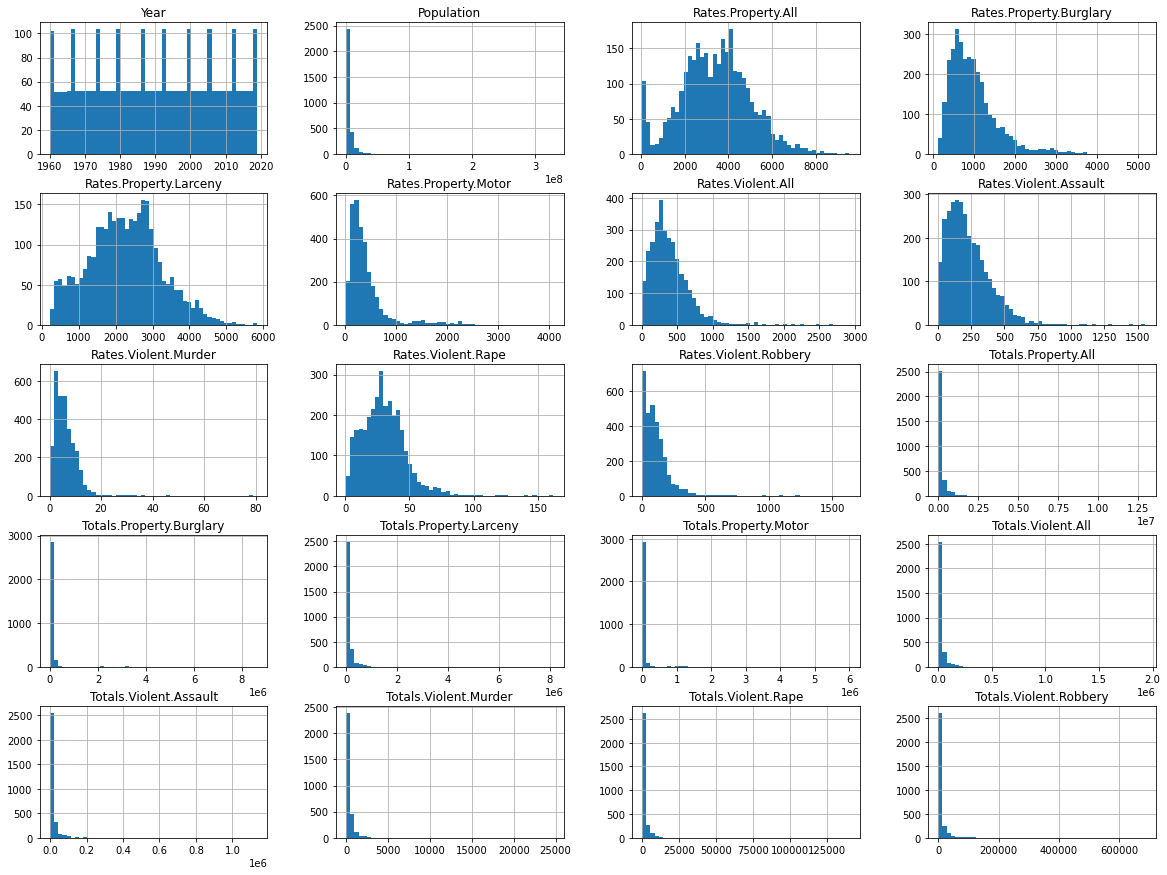

In [32]:
# Plotting histograms
crimedat.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
# Barplot
crimedat.groupby('Rates.Property.All').count().plot(kind='bar')

### 4. Analysis

In [59]:
# 1.Correlation
crimedat.corr().style.background_gradient(cmap="YlOrBr")
# From the below chart, Totals.Property.All and Totals.Property.Larceny are highly correlated with number of 0.996620.
# Rates.Property.All and Rates.Violent.All has the correlation of 0.605. They are not highly correlated but there are 
# correlations between them.

,Year,Population,Rates.Property.All,Rates.Property.Burglary,Rates.Property.Larceny,Rates.Property.Motor,Rates.Violent.All,Rates.Violent.Assault,Rates.Violent.Murder,Rates.Violent.Rape,Rates.Violent.Robbery,Totals.Property.All,Totals.Property.Burglary,Totals.Property.Larceny,Totals.Property.Motor,Totals.Violent.All,Totals.Violent.Assault,Totals.Violent.Murder,Totals.Violent.Rape,Totals.Violent.Robbery,high property rates
Year,1.000000,0.050059,-0.109736,0.063776,0.018142,0.269713,0.224697,0.267353,-0.095315,0.547618,-0.011344,0.015512,0.038469,0.033427,0.074561,0.062184,0.069569,0.012878,0.095186,0.016006,-0.065728
Population,0.050059,1.000000,0.016567,0.034395,0.002067,0.049286,0.072642,0.060956,0.016995,0.017843,0.068558,0.925284,0.873094,0.943337,0.777945,0.955135,0.936307,0.958517,0.964928,0.904668,0.029479
Rates.Property.All,-0.109736,0.016567,1.000000,0.283275,0.966469,-0.039365,0.604967,0.626771,0.439736,0.364228,0.586958,0.117272,0.026988,0.105172,-0.022705,0.084167,0.092147,0.080214,0.047071,0.122294,0.797199
Rates.Property.Burglary,0.063776,0.034395,0.283275,1.000000,0.253252,0.802431,0.421198,0.231200,0.304739,0.357103,0.309082,0.043354,0.158467,0.042144,0.159464,0.065611,0.036009,0.069348,0.060622,0.058082,0.356252
Rates.Property.Larceny,0.018142,0.002067,0.966469,0.253252,1.000000,-0.041332,0.562110,0.605975,0.358665,0.418496,0.502916,0.094482,0.012957,0.087791,-0.027121,0.066901,0.077480,0.054255,0.039117,0.093109,0.784214
Rates.Property.Motor,0.269713,0.049286,-0.039365,0.802431,-0.041332,1.000000,0.379389,0.169165,0.240164,0.324372,0.247248,0.022601,0.150262,0.028094,0.194423,0.071260,0.042430,0.055832,0.072300,0.047530,0.102304
Rates.Violent.All,0.224697,0.072642,0.604967,0.421198,0.562110,0.379389,1.000000,0.903180,0.774330,0.575134,0.873127,0.119819,0.092339,0.116029,0.081210,0.144921,0.143126,0.124334,0.107555,0.158512,0.481321
Rates.Violent.Assault,0.267353,0.060956,0.626771,0.231200,0.605975,0.169165,0.903180,1.000000,0.645875,0.558187,0.641479,0.116299,0.057302,0.113760,0.042503,0.135603,0.150022,0.108514,0.099887,0.137539,0.509069
Rates.Violent.Murder,-0.095315,0.016995,0.439736,0.304739,0.358665,0.240164,0.774330,0.645875,1.000000,0.247646,0.765023,0.048185,0.035703,0.041538,0.018173,0.051780,0.047678,0.074603,0.028192,0.069300,0.292993
Rates.Violent.Rape,0.547618,0.017843,0.364228,0.357103,0.418496,0.324372,0.575134,0.558187,0.247646,1.000000,0.332699,0.043792,0.043817,0.047607,0.045772,0.062212,0.064393,0.038366,0.082687,0.047518,0.315009


Text(0.5, 1.0, 'Rates in Property VS Rates in Violent')

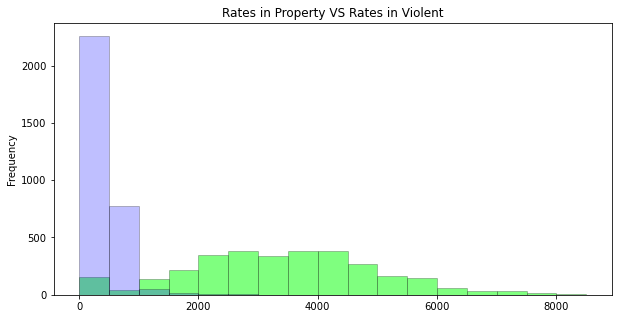

In [61]:
# I wanted to see the correlations between two different crime rates in the U.S. 
# I chose violent crime rates as a dependant variable and property crime rates as an independant variable.

# 1. Plotting histogram of Rates in Property and Violent
edgecolor = 0,0,0,0.25
ax = (crimedat['Rates.Property.All']).plot.hist(figsize=(10, 5),color = (0,1,0,0.5), edgecolor = edgecolor
                                                , bins=range(0,9000,500))
ax = (crimedat['Rates.Violent.All']).plot.hist(figsize=(10, 5),color = (0,0,1,0.25), edgecolor = edgecolor
                                               , bins=range(0,9000,500))
plt.title('Rates in Property VS Rates in Violent')

# Green colored histograms are the property crime rates and the purple histograms are the violent crime rates.
# Frequency of the violent crime rates are higher than the property crime rates.

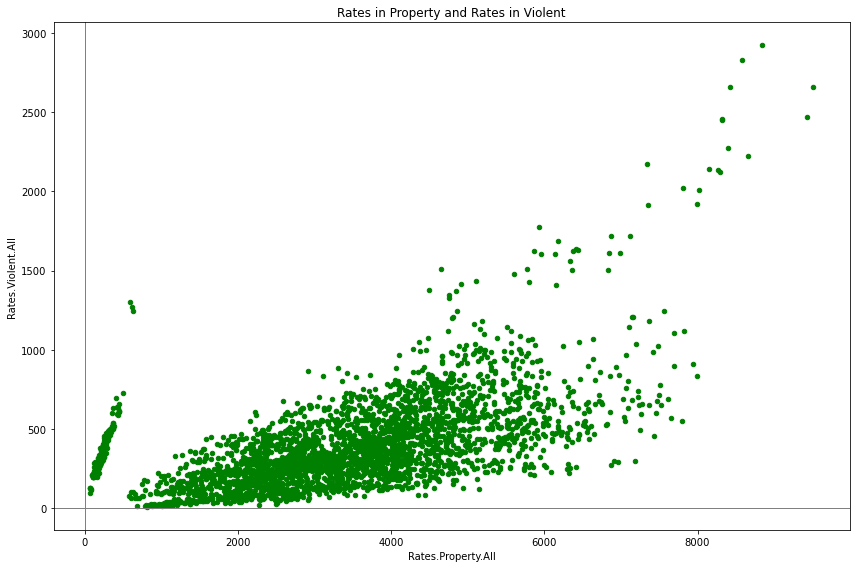

In [53]:
# 2. Plotting scatterplot of bmi and bp
ax = crimedat.plot.scatter(x = 'Rates.Property.All', y= 'Rates.Violent.All',
                           color ="green",  figsize=(12, 8))
ax.set_xlabel('Rates.Property.All')
ax.set_ylabel('Rates.Violent.All')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.title('Rates in Property and Rates in Violent')
plt.tight_layout()
plt.show()

In [28]:
crimes = crimedat[['Rates.Property.All','Rates.Violent.All']].copy()

In [29]:
crimes.sample(10)

,Rates.Property.All,Rates.Violent.All
2720,5050.0,267.4
1225,4538.2,834.6
2708,4038.6,208.5
2548,4473.8,765.8
1535,4456.8,663.8
2755,815.9,9.5
1219,5499.1,795.5
62,1564.6,91.5
2236,6558.2,478.7
384,4235.0,393.8


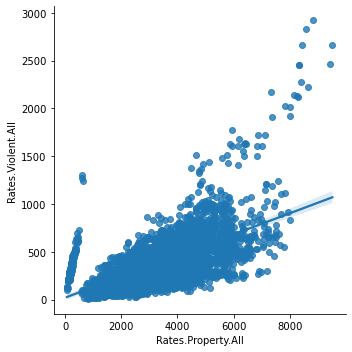

In [44]:
# 3. Linear Regression
sns.lmplot(data=crimedat, x='Rates.Property.All',y='Rates.Violent.All')
# While property crime rates clustered between 0 to 6,000 mostly, violent crime rates clustered between 0 to 500 mostly. 
# Increase in property crime rates will result slight increase in violent crime rates.

In [141]:
# 4. 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X = crimedat['Rates.Property.All']
y = crimedat['Rates.Violent.All']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.2)


In [144]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
linear_regression = LinearRegression()
model = linear_regression.fit(X_train, y_train)
y_pred = model.predict(X_test)
crimedat = pd.DataFrame({'test': y_test, 'predicted': y_pred})

ValueError: Expected 2D array, got 1D array instead:
array=[4521.7 5054.   168.9 ... 2976.  3161.5 3748.2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

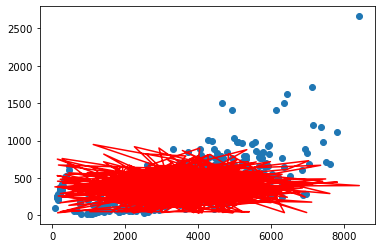

In [145]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')